<a href="https://colab.research.google.com/github/Tirtoajin/Analisis-Data-Rumah-Sakit-di-Indonesia-untuk-Pemahaman-Distribusi-dan-Karakteristik-Layanan/blob/main/Rumah_Sakit_Indoneisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Menelaah Data (Data Understanding)
Langkah-langkah:

📥 Import Library
📂 Load Dataset
ℹ️ Check the General Information

## Mengumpulkan Data

In [181]:
# impor library pandas dan numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Memuat dataset ke dalam pandas DataFrame
df = pd.read_csv("/content/New_RumahSakitIndonesia.xlsx - DataSheetClean_RumahSakitIndonesia.csv")
# Menampilkan beberapa baris pertama dari dataset
df.head()

,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
0,1110053.0,RS Arun Lhokseumawe,Aceh,Kota Lhokseumawe,Jl. Plaju Komplek Perumahan PT Arun Batuphat T...,Rumah Sakit Umum,C,Non BLU/BLUD,SWASTA/LAINNYA,218,36,328
1,1106014.0,RS Umum Fandika,Aceh,Aceh Tengah,Jl. Terminal Simpang Wariji Blangkolak 1 Kec. ...,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,45,15,45
2,1171110.0,RS Umum Daerah Meuraxa,Aceh,Kota Banda Aceh,Jl. Soekarno Hatta Km. 2 Desa Mibo Kecamatan B...,Rumah Sakit Umum,B,BLUD,Pemkot,310,77,487
3,1171163.0,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,NaN,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0
4,1102027.0,RS Umum Daerah Kota Subulussalam,Aceh,Kota Subulussalam,Jl. Hamzah Fansyuri (Subulussalam-Rundeng) Kec...,Rumah Sakit Umum,C,BLUD,Pemkot,189,34,537


In [183]:
#melihat jumlah baris dan kolom
df.shape



(3167, 12)

Berdasarkan output diatas dapat dilihat bahwa data memiliki 3167 baris dan 12 kolom

In [184]:
# Mendapatkan statistik deskriptif untuk kolom numerik
print(df.describe())

            Kode_RS  Total_Tempat_Tidur  Total_Layanan  Total_Tenaga_Kerja
count  3.166000e+03         3167.000000    3167.000000         3167.000000
mean   3.805750e+06          135.257026      48.316072          261.490685
std    2.006896e+06          549.924419     409.112055          381.753118
min    1.101015e+06            0.000000      -5.000000            0.000000
25%    3.171911e+06           54.000000      22.000000           57.000000
50%    3.326014e+06          102.000000      31.000000          153.000000
75%    5.103053e+06          154.500000      50.000000          335.000000
max    9.271080e+06        30343.000000   23000.000000         7939.000000


In [185]:
# Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kode_RS             3166 non-null   float64
 1   Nama_RS             3167 non-null   object 
 2   Provinsi            3167 non-null   object 
 3   Kabupaten           3167 non-null   object 
 4   Alamat_RS           3129 non-null   object 
 5   Jenis_RS            3166 non-null   object 
 6   Kelas_RS            3167 non-null   object 
 7   Status_Blu          3167 non-null   object 
 8   Kepemilikan_RS      3167 non-null   object 
 9   Total_Tempat_Tidur  3167 non-null   int64  
 10  Total_Layanan       3167 non-null   int64  
 11  Total_Tenaga_Kerja  3167 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 297.0+ KB


Dari output diatas dapat dilihat bahwa ada beberapa nilai kosong pada kolom Kode_RS, Alamat_RS, Jenis_RS

In [186]:
# Memeriksa jumlah nilai yang hilang di setiap kolom. terlihat ada beberapa yang  null
print(df.isnull().sum())

Kode_RS                1
Nama_RS                0
Provinsi               0
Kabupaten              0
Alamat_RS             38
Jenis_RS               1
Kelas_RS               0
Status_Blu             0
Kepemilikan_RS         0
Total_Tempat_Tidur     0
Total_Layanan          0
Total_Tenaga_Kerja     0
dtype: int64


In [187]:
df[df['Kode_RS'].isnull()]



,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
112,NaN,RS Umum Estomihi,Sumatera Utara,Kota Medan,"Jl. Sisinga Mangaraja 235,Medan",Rumah Sakit Umum,C,Non BLU/BLUD,Perusahaan,115,28,170


In [188]:
df[df['Alamat_RS'].isnull()]

,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
3,1171163.0,RS Gigi Mulut Universitas Syiah Kuala,Aceh,Kota Banda Aceh,NaN,Rumah Sakit Khusus Gigi dan Mulut,B,BLU,Kementerian Lain,11,24,0
9,1106025.0,RS Gayo Medical Centre,Aceh,Aceh Tengah,NaN,Rumah Sakit Umum,D,Non BLU/BLUD,SWASTA/LAINNYA,60,56,0
20,1174100.0,RS Tk. IV Lhokseumawe Aceh Utara,Aceh,Kota Lhokseumawe,NaN,Rumah Sakit Umum,C,Non BLU/BLUD,TNI AD,171,60,303
36,1115012.0,RS Umum Daerah Sultan Iskandar Muda Nagan Raya,Aceh,Nagan Raya,NaN,Rumah Sakit Umum,C,BLUD,Pemkab,215,44,577
39,1103021.0,RS Cahaya Sehat,Aceh,Aceh Selatan,NaN,Rumah Sakit Umum,D,Non BLU/BLUD,Kementerian Lain,71,20,0
70,1118012.0,RS Umum Daerah Pidie Jaya,Aceh,Pidie Jaya,NaN,Rumah Sakit Umum,B,BLUD,Pemkab,250,16,235
90,1214010.0,RS Umum Daerah Lukas Hilisimaetano,Sumatera Utara,Nias Selatan,NaN,Rumah Sakit Umum,D,Non BLU/BLUD,Pemkab,50,4,0
126,1275783.0,RS Ibu dan Anak Murni Teguh Rosiva,Sumatera Utara,Kota Medan,NaN,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,Perusahaan,57,18,25
317,1312025.0,RS Ibu dan Anak AL-Ihsan,Sumatera Barat,Pasaman Barat,NaN,Rumah Sakit Khusus Ibu dan Anak,C,Non BLU/BLUD,Perorangan,26,21,45
402,1407012.0,RS Umum Awal Bros Ujung Batu,Riau,Rokan Hulu,NaN,Rumah Sakit Umum,C,Non BLU/BLUD,Perusahaan,145,84,169


In [189]:
df[df['Jenis_RS'].isnull()]

,Kode_RS,Nama_RS,Provinsi,Kabupaten,Alamat_RS,Jenis_RS,Kelas_RS,Status_Blu,Kepemilikan_RS,Total_Tempat_Tidur,Total_Layanan,Total_Tenaga_Kerja
1751,3471085.0,RS Khusus Jiwa Puri Nirmala,Yogyakarta,Kota Yogyakarta,Jl Jayaningprangan No. 13 Gunungketur Pakualam...,NaN,Rumah Sakit Khusus Jiwa,C,Non BLU/BLUD,1296,27,13


In [190]:
# Cek jumlah duplikat (semua kolom)
print("Jumlah duplikat:", df.duplicated().sum())

# Tampilkan baris yang duplikat (jika ada)
duplikat = df[df.duplicated()]
print(duplikat)

Jumlah duplikat: 11
        Kode_RS                           Nama_RS             Provinsi  \
128   1212177.0                    RS Umum Yoshua       Sumatera Utara   
388   1471237.0                          RS  Eria                 Riau   
969   3207056.0                   RS Umum Al-Arif           Jawa Barat   
1442  3318075.0         RS Umum Mitra Bangsa Pati          Jawa Tengah   
1770  3471030.0  RS Tk. III 04.06.03 Dr. Soetarto           Yogyakarta   
1856  3516036.0         RS Mutiara Hati Mojokerto           Jawa Timur   
2360  5102047.0          RS Umum Daerah Singasana                 Bali   
2535  5320013.0                 RS Pratama Raijua  Nusa Tenggara Timur   
2717  6472096.0            RS Umum Bhakti Nugraha     Kalimantan Timur   
2952  7314025.0        RS Umum Anugrah Pangkajene     Sulawesi Selatan   
3099  9106013.0      RS Umum Daerah Scholoo Keyen     Papua Barat Daya   

              Kabupaten                                          Alamat_RS  \
128        De

### Memvalidasi Data

In [191]:
# Hapus baris dengan Kode_RS kosong
df["Kode_RS"] = df["Kode_RS"].fillna("Belum Diketahui")

# Isi Alamat_RS kosong dengan "Tidak Diketahui"
df["Alamat_RS"] = df["Alamat_RS"].fillna("Belum Diketahui")

# Isi Jenis_RS kosong dengan mode (nilai terbanyak)
df["Jenis_RS"] = df["Jenis_RS"].fillna("Belum Diketahui")

In [192]:
# Cek Jumlah Data setelah proses diatas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kode_RS             3167 non-null   object
 1   Nama_RS             3167 non-null   object
 2   Provinsi            3167 non-null   object
 3   Kabupaten           3167 non-null   object
 4   Alamat_RS           3167 non-null   object
 5   Jenis_RS            3167 non-null   object
 6   Kelas_RS            3167 non-null   object
 7   Status_Blu          3167 non-null   object
 8   Kepemilikan_RS      3167 non-null   object
 9   Total_Tempat_Tidur  3167 non-null   int64 
 10  Total_Layanan       3167 non-null   int64 
 11  Total_Tenaga_Kerja  3167 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 297.0+ KB
None


Dataset sudah bersih, semua nilai yang kosong diisi dengan:

Kode_RS kosong = diisi "Belum Diketahui"

Alamat_RS kosong = diisi "Belum Diketahui"

Jenis_RS kosong = diisi "Belum Diketahui"

Diisi dengan "Belum Diketahui" agar nilai data rumah sakit di setiap provinsi tidak berkurang. Tidak dihapus karena seharusnya mungkin bisa diisi dengan berdiskusi dengan divisi lain


In [193]:
# Cek jumlah duplikat (semua kolom)
print("Jumlah duplikat:", df.duplicated().sum())

# Menghapus baris duplikat lengkap (membiarkan satu baris yang pertama)
df.drop_duplicates(inplace=True)

# Memeriksa kembali jumlah baris duplikat lengkap setelah penghapusan
print("Jumlah baris duplikat lengkap setelah penghapusan:", df.duplicated().sum())

Jumlah duplikat: 11
Jumlah baris duplikat lengkap setelah penghapusan: 0


In [194]:
# cek isi data setelah  menghapus data duplikat
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3156 entries, 0 to 3166
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Kode_RS             3156 non-null   object
 1   Nama_RS             3156 non-null   object
 2   Provinsi            3156 non-null   object
 3   Kabupaten           3156 non-null   object
 4   Alamat_RS           3156 non-null   object
 5   Jenis_RS            3156 non-null   object
 6   Kelas_RS            3156 non-null   object
 7   Status_Blu          3156 non-null   object
 8   Kepemilikan_RS      3156 non-null   object
 9   Total_Tempat_Tidur  3156 non-null   int64 
 10  Total_Layanan       3156 non-null   int64 
 11  Total_Tenaga_Kerja  3156 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 320.5+ KB
None


In [195]:
# Save file dataset yang sudah di bersihkan
df.to_csv("Clean_RumahSakitIndonesia.csv", index=False)

Menentukan Objek Data (Data Preprocessing)

/tmp/ipython-input-3459929377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order.values, y=order.index, palette="viridis")


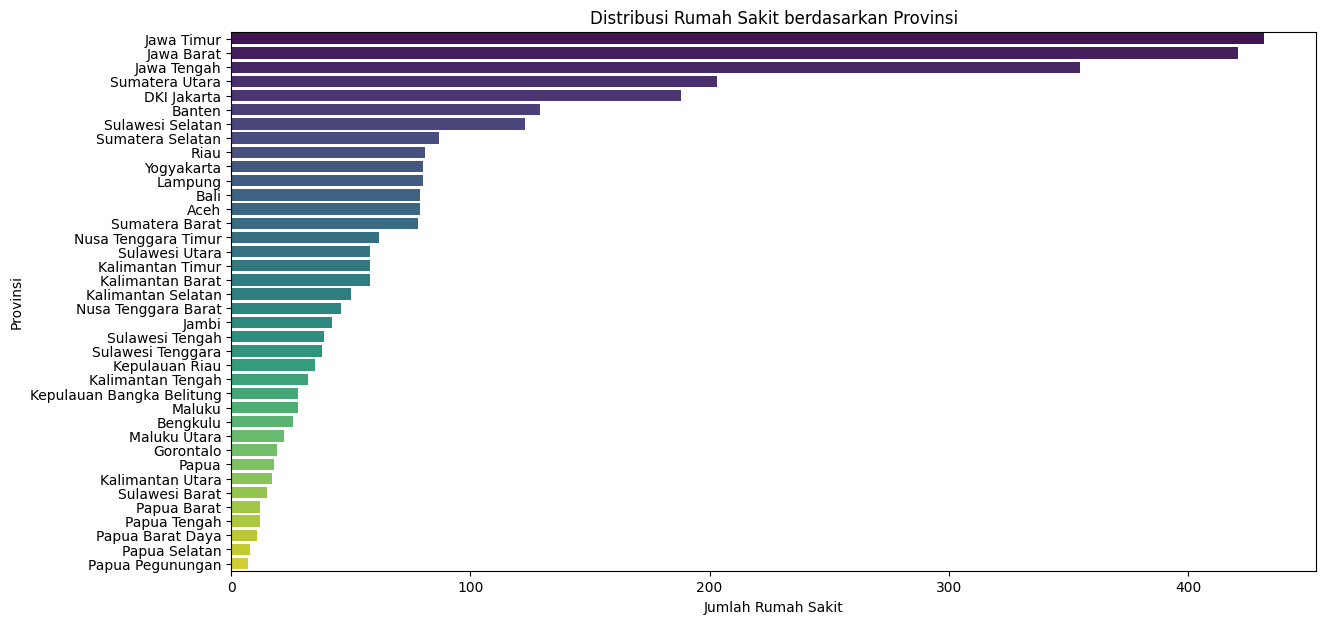

In [196]:
def plot_distribution_all(column, title):
    plt.figure(figsize=(14,7))
    order = df[column].value_counts()   # semua kategori
    sns.barplot(x=order.values, y=order.index, palette="viridis")
    plt.title(f"Distribusi Rumah Sakit berdasarkan {title}")
    plt.xlabel("Jumlah Rumah Sakit")
    plt.ylabel(title)
    plt.show()
    return order

# Distribusi semua Provinsi
provinsi_count_all = plot_distribution_all("Provinsi", "Provinsi")


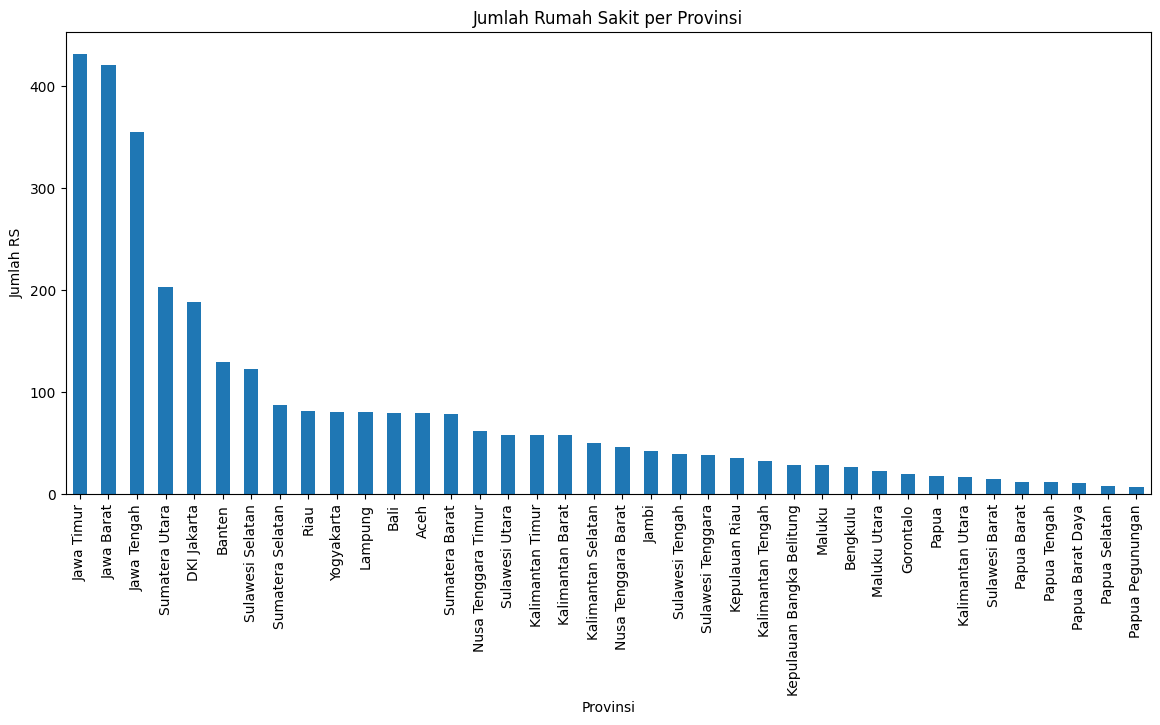

In [197]:
# Jumlah Rumah Sakit per Provinsi
rs_prov = df["Provinsi"].value_counts()
rs_prov.plot(kind="bar", figsize=(14,6))
plt.title("Jumlah Rumah Sakit per Provinsi")
plt.ylabel("Jumlah RS")
plt.xlabel("Provinsi")
plt.xticks(rotation=90)
plt.show()

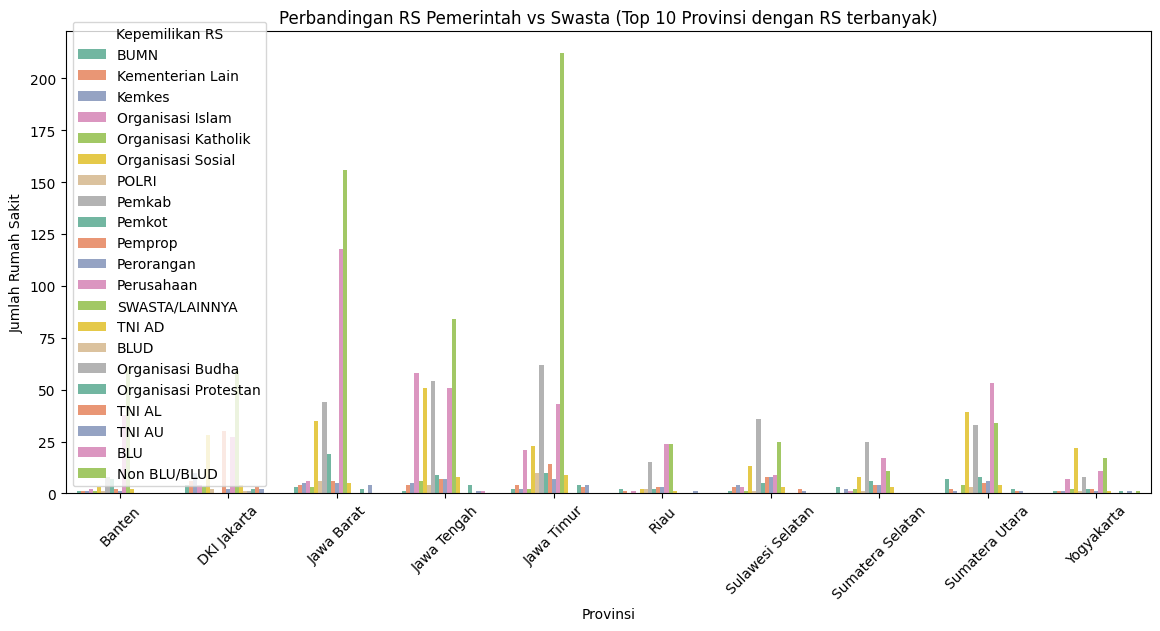

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil 10 provinsi dengan RS terbanyak
top10_prov = df["Provinsi"].value_counts().head(10).index

# Filter hanya 10 provinsi tersebut
df_top10 = df[df["Provinsi"].isin(top10_prov)]

# Hitung jumlah RS berdasarkan Kepemilikan per Provinsi
prov_kepemilikan = df_top10.groupby(["Provinsi", "Kepemilikan_RS"]).size().reset_index(name="Jumlah_RS")

# Buat barplot side-by-side
plt.figure(figsize=(14,6))
sns.barplot(data=prov_kepemilikan, x="Provinsi", y="Jumlah_RS", hue="Kepemilikan_RS", palette="Set2")

plt.title("Perbandingan RS Pemerintah vs Swasta (Top 10 Provinsi dengan RS terbanyak)")
plt.ylabel("Jumlah Rumah Sakit")
plt.xlabel("Provinsi")
plt.xticks(rotation=45)
plt.legend(title="Kepemilikan RS")
plt.show()


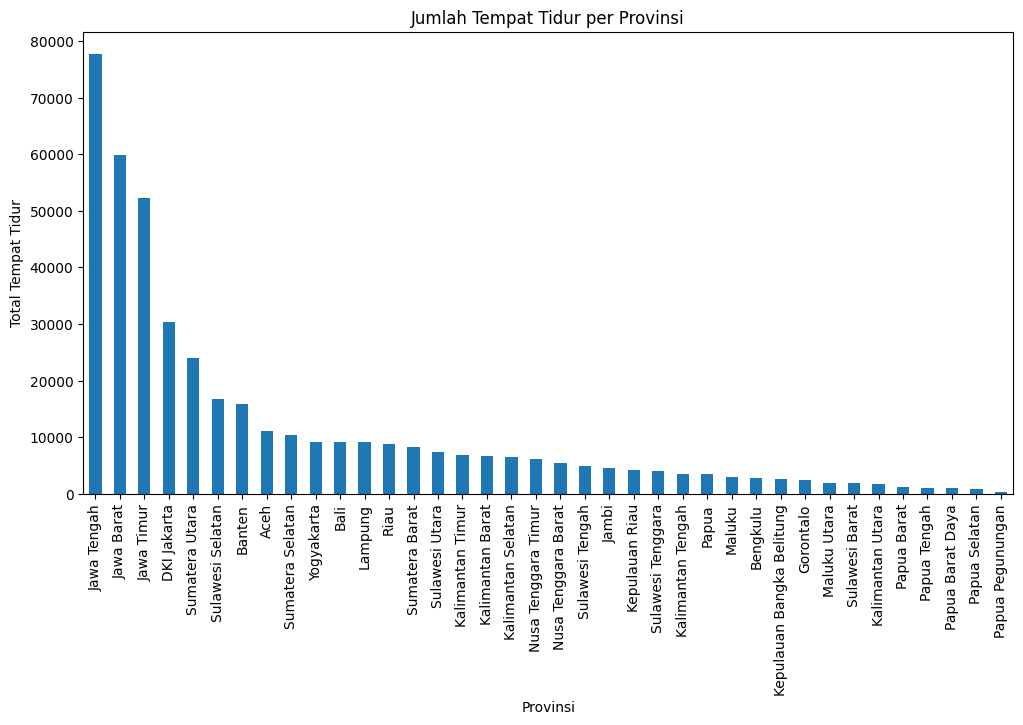

In [199]:
# Jumlah tempat tidur per provinsi
tempat_tidur = df.groupby("Provinsi")["Total_Tempat_Tidur"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
tempat_tidur.plot(kind="bar")
plt.title("Jumlah Tempat Tidur per Provinsi")
plt.ylabel("Total Tempat Tidur")
plt.xlabel("Provinsi")
plt.xticks(rotation=90)
plt.show()

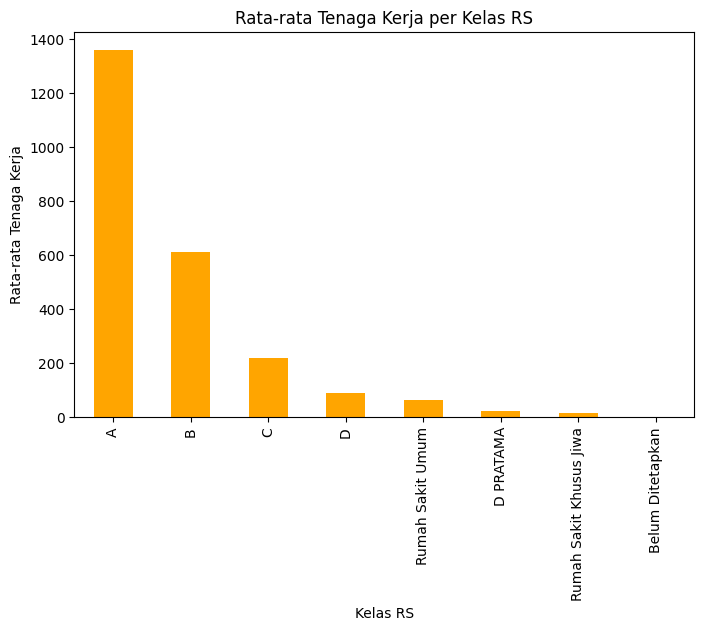

In [200]:
# Rata-rata tenaga kerja per kelas rumah sakit
tenaga_kerja = df.groupby("Kelas_RS")["Total_Tenaga_Kerja"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
tenaga_kerja.plot(kind="bar", color="orange")
plt.title("Rata-rata Tenaga Kerja per Kelas RS")
plt.ylabel("Rata-rata Tenaga Kerja")
plt.xlabel("Kelas RS")
plt.show()


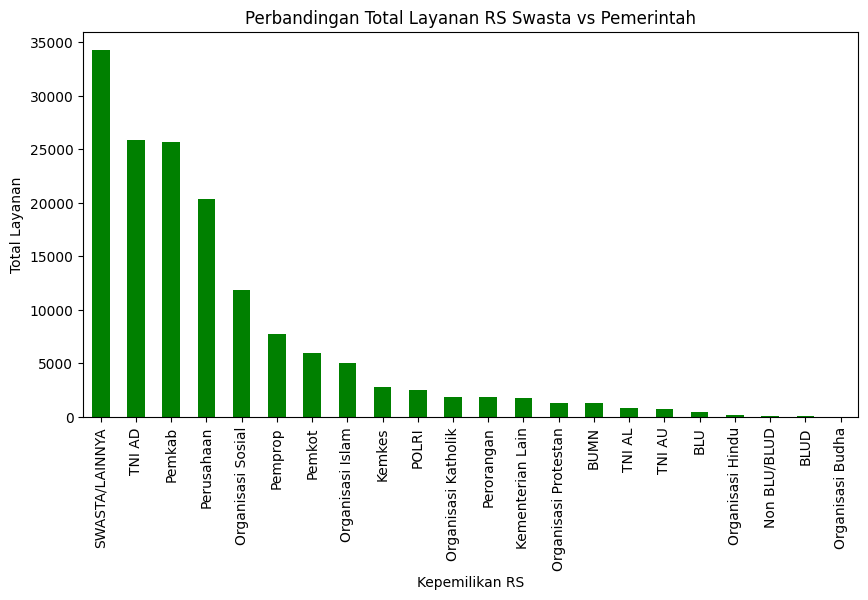

In [201]:
# Perbandingan layanan rumah sakit swasta vs pemerintah
layanan_kepemilikan = df.groupby("Kepemilikan_RS")["Total_Layanan"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
layanan_kepemilikan.plot(kind="bar", color="green")
plt.title("Perbandingan Total Layanan RS Swasta vs Pemerintah")
plt.ylabel("Total Layanan")
plt.xlabel("Kepemilikan RS")
plt.show()

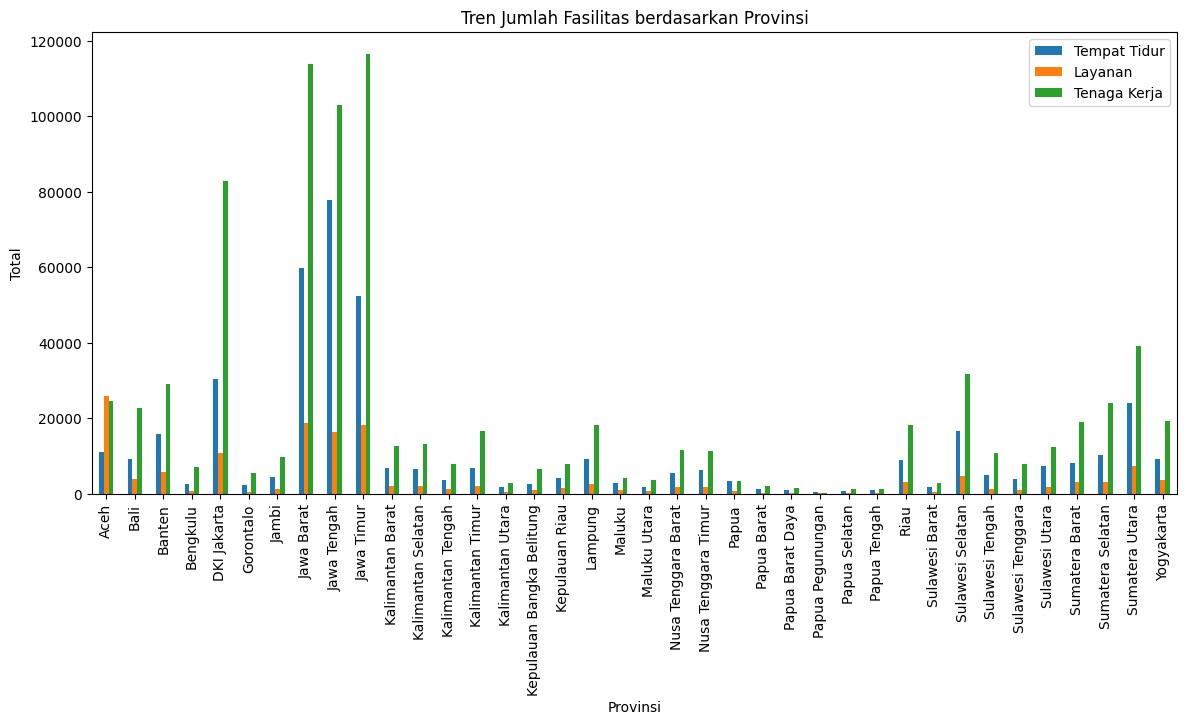

In [202]:
fasilitas = df.groupby("Provinsi")[["Total_Tempat_Tidur", "Total_Layanan", "Total_Tenaga_Kerja"]].sum()
fasilitas.plot(kind="bar", figsize=(14,6))
plt.title("Tren Jumlah Fasilitas berdasarkan Provinsi")
plt.ylabel("Total")
plt.xlabel("Provinsi")
plt.xticks(rotation=90)
plt.legend(["Tempat Tidur", "Layanan", "Tenaga Kerja"])
plt.show()

/tmp/ipython-input-4107013358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x="Provinsi", y="Total_Tempat_Tidur", palette="Set3")


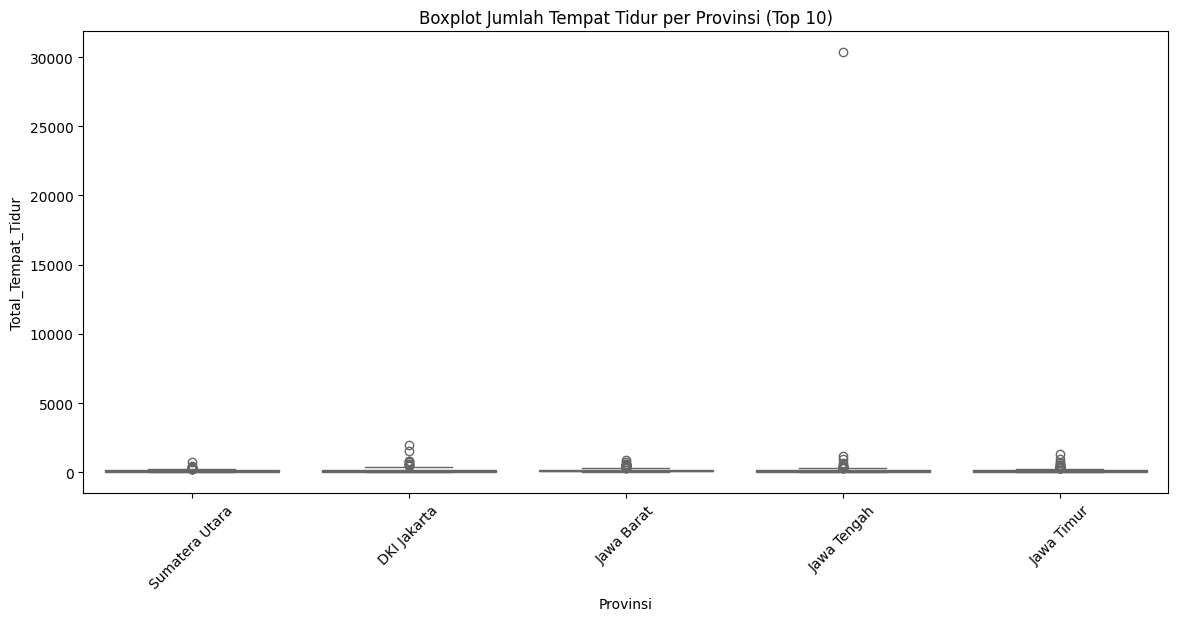

/tmp/ipython-input-4107013358.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kelas_RS", y="Total_Tenaga_Kerja", palette="Set2")


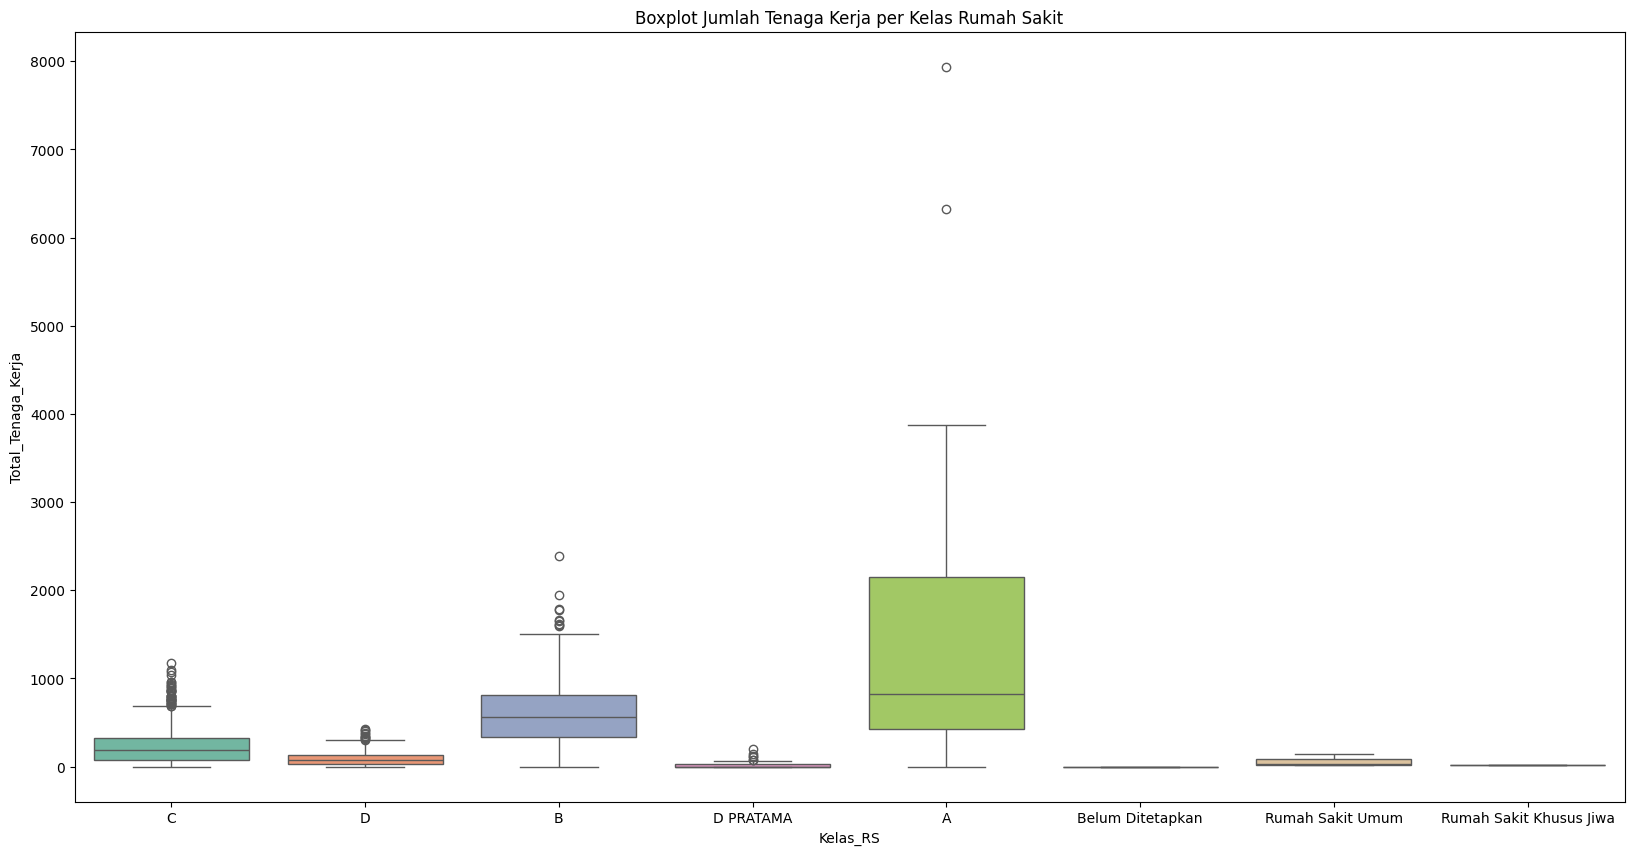

In [203]:
# Boxplot Tempat Tidur per Provinsi (Top 10 biar tidak terlalu ramai)
top10_prov = df["Provinsi"].value_counts().head(5).index
df_top10 = df[df["Provinsi"].isin(top10_prov)]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_top10, x="Provinsi", y="Total_Tempat_Tidur", palette="Set3")
plt.title("Boxplot Jumlah Tempat Tidur per Provinsi (Top 10)")
plt.xticks(rotation=45)
plt.show()

# Boxplot Tenaga Kerja per Kelas RS
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="Kelas_RS", y="Total_Tenaga_Kerja", palette="Set2")
plt.title("Boxplot Jumlah Tenaga Kerja per Kelas Rumah Sakit")
plt.show()

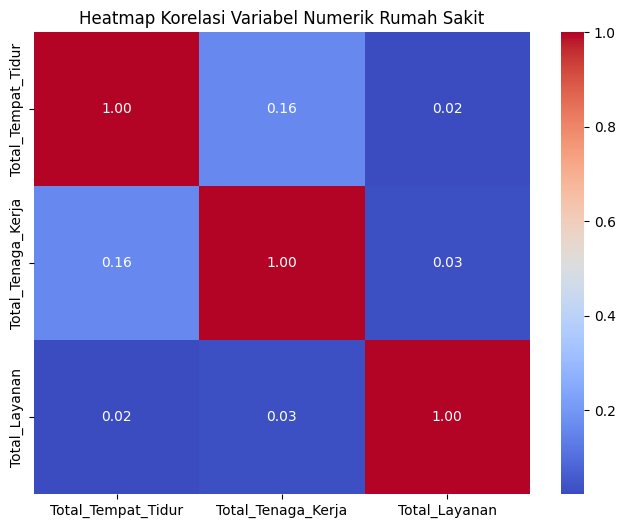

In [204]:
# Pilih kolom numerik
num_cols = ["Total_Tempat_Tidur", "Total_Tenaga_Kerja", "Total_Layanan"]

# Hitung korelasi
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik Rumah Sakit")
plt.show()

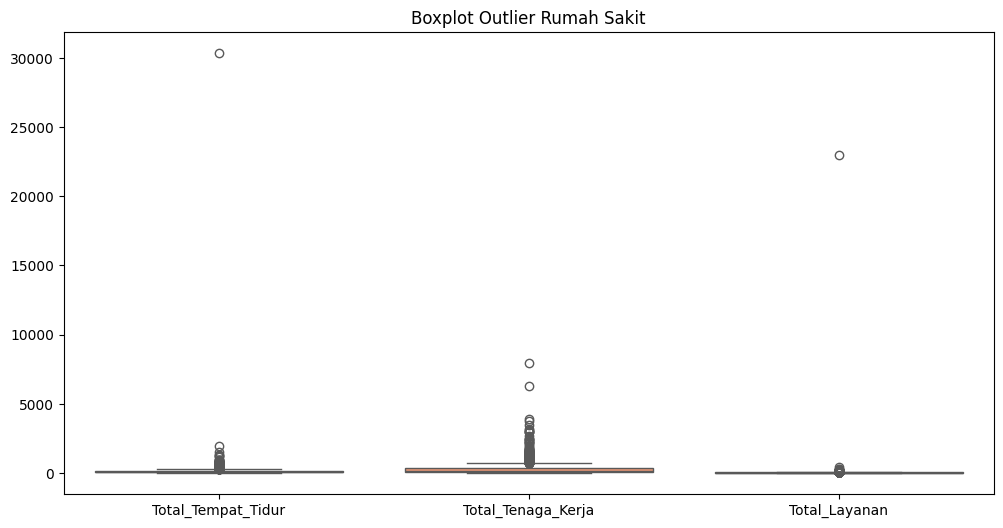

Total_Tempat_Tidur = 151 outlier
Total_Tenaga_Kerja = 205 outlier
Total_Layanan = 267 outlier


In [205]:
# Kolom numerik yang mau dicek
num_cols = ["Total_Tempat_Tidur", "Total_Tenaga_Kerja", "Total_Layanan"]

# Boxplot untuk lihat outlier
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title("Boxplot Outlier Rumah Sakit")
plt.show()

# Deteksi Outlier dengan IQR
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col]

# Tampilkan jumlah outlier tiap kolom
for col, vals in outliers.items():
    print(f"{col} = {len(vals)} outlier")

### Insight

- Provinsi dengan jumlah RS terbanyak adalah Jawa Barat, Jawa Timur, dan Jawa Tengah.
- RS pemerintah mendominasi di sebagian besar provinsi, sedangkan RS swasta lebih banyak di perkotaan besar.
- Jumlah tenaga kerja cenderung meningkat sesuai dengan kelas RS.
- Terdapat korelasi positif antara jumlah tempat tidur dan jumlah tenaga kerja.
- Distribusi fasilitas kesehatan masih belum merata di seluruh provinsi.


### Saran

- Pemerintah dapat fokus menambah fasilitas di provinsi dengan backlog fasilitas.
- Swasta memiliki peluang membuka RS baru di daerah dengan jumlah RS terbatas.
- Optimalisasi jumlah tenaga kerja agar sebanding dengan kapasitas fasilitas.
- Penguatan BLU/BLUD agar lebih mandiri dalam pelayanan.


### Kesimpulan

Analisis data rumah sakit Indonesia menunjukkan adanya ketimpangan distribusi fasilitas antar provinsi. Pemerintah perlu meningkatkan jumlah fasilitas di luar Jawa untuk mengurangi kesenjangan pelayanan kesehatan. Sektor swasta dapat memperluas jaringan rumah sakit di daerah yang berkembang. Selain itu, digitalisasi data rumah sakit penting untuk memantau fasilitas secara real-time dan mendukung pengambilan keputusan yang lebih baik.